In [3]:
# # Project proposal
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import date
from scipy.stats import zscore
import re 
import seaborn as sns; sns.set(style="ticks", color_codes=True)



In [4]:
#reanding the file 
name_file2 = '/home/xibelly/Documentos/data_incubator/Input/temp_datalab_records_linkedin_company.csv'

data_project = pd.read_csv(name_file2, sep=',')
data_project.head()

/etc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [5]:
#type of variables
data_project.dtypes


dataset_id                 int64
as_of_date                object
company_name              object
followers_count            int64
employees_on_platform      int64
link                      object
industry                  object
date_added                object
date_updated              object
description               object
website                   object
entity_id                float64
cusip                    float64
isin                     float64
dtype: object

In [6]:
#general information
data_project.describe()

,dataset_id,followers_count,employees_on_platform,entity_id,cusip,isin
count,2.426196e+06,2.426196e+06,2.426196e+06,0.0,0.0,0.0
mean,7.347932e+05,7.167738e+04,7.587255e+03,NaN,NaN,NaN
std,5.004440e+05,2.638344e+05,2.412444e+04,NaN,NaN,NaN
min,5.832900e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,6.851400e+04,2.148000e+03,2.180000e+02,NaN,NaN,NaN
50%,8.790880e+05,9.335000e+03,1.083000e+03,NaN,NaN,NaN
75%,9.029690e+05,3.864200e+04,4.513000e+03,NaN,NaN,NaN
max,2.339486e+06,7.833967e+06,5.779520e+05,NaN,NaN,NaN


In [7]:
print("data analysis (Number of variables, Number of observations)")
print('Number of variables: {0}'.format(data_project.shape[1]))
print('Number of observations: {0}'.format(data_project.shape[0]))


data analysis (Number of variables, Number of observations)
Number of variables: 14
Number of observations: 2426196


In [8]:
#statistical analysis of 'followers_count','employees_on_platform' groupby 'company_name','industry'
data_project.groupby(['industry','company_name'])['followers_count','employees_on_platform'].describe()

followers_count  \
                                                                            count   
industry            company_name                                                    
Accounting          CBIZ Tofias                                              93.0   
                    Cherokee Inc.                                            93.0   
                    Computerized Waste Systems                               94.0   
                    GSV Capital Corp (0GV)                                   94.0   
                    General Dynamics Shared Resources                        93.0   
                    ImmuCell Corp                                            93.0   
                    Liberty Tax                                             713.0   
                    Liberty Tax Service                                      93.0   
                    Northfield Bancorp Inc/NJ (NFBK)                         93.0   
                    Thomson Reuters Checkpoint                               94.0   
Airlines/Aviation   AAR                                                     245.0   
                    AAR CORP.                                               130.0   
                    ABX Air, Inc.                                           588.0   
                    ASUR                                                    584.0   
                    AerCap                                                  689.0   
                    Air Lease Corporation                                   588.0   
                    Air Transport Services Group, Inc.                        2.0   
                    Airborne Maintenance and Engineering Services           588.0   
                    Alaska Airlines                                         960.0   
                    Allegiant                                               589.0   
                    American Airlines                                       974.0   
                    Atlas Air                                               376.0   
                    Avianca                                                 581.0   
                    Avianca Holdings S.A.                                    93.0   
                    Bristow Group                                           818.0   
                    CAE Oxford Aviation Academy                             649.0   
                    China Southern Airlines                                 564.0   
                    Copa Airlines                                           669.0   
                    Delta Air Lines                                         957.0   
                    GOL Linhas Aéreas Inteligentes                          569.0   
...                                                                           ...   
Wholesale           Transcat                                                508.0   
Wine and Spirits    Constellation Brands                                    868.0   
                    Brown-Forman                                            963.0   
                    Diageo                                                  957.0   
                    Smirnoff Ice                                             93.0   
                    Willamette Valley Vineyards                             353.0   
Wireless            Aerohive Networks                                       356.0   
                    ARC Wireless, LLC                                       583.0   
                    Boingo Wireless                                         652.0   
                    CalAmp                                                  373.0   
                    Digi International                                      562.0   
                    InterDigital Communications                             259.0   
                    InterDigital, Inc.                                      339.0   
                    Iridium                                            

In [9]:
#Analysis of the quiantity of NaN in the data set

def revisionNull(df):
    a=df.isnull().sum()
    resulNa=[ re for re in a if re>0 ]
    if resulNa:
        print(resulNa)
        
    else :
        print("The dataframe has not NA values")
        

revisionNull(data_project)


[36265, 1825278, 1935971, 2426196, 2426196, 2426196]


In [10]:
#Levels of categorical data

variables_Categoricas  = list(data_project.select_dtypes(include=['object','datetime64']).columns)  
for variable in  variables_Categoricas:
        print("--"*30,'COLUMNA:',variable)
        #plt.cla()
        print("VALORES :\n ", pd.Series.value_counts(data_project[variable]))


------------------------------------------------------------ COLUMNA: as_of_date
VALORES :
  2018-02-17    4430
2018-02-16    4429
2018-02-15    4427
2018-02-14    4427
2018-02-13    4427
2017-12-28    4426
2018-02-05    4426
2018-02-07    4426
2018-01-14    4426
2018-01-04    4426
2018-02-08    4426
2017-12-19    4426
2018-01-03    4426
2018-01-02    4426
2018-01-01    4426
2018-01-11    4426
2017-12-31    4426
2018-01-07    4426
2018-02-10    4426
2017-12-25    4426
2018-01-12    4426
2017-12-24    4426
2018-02-09    4426
2017-12-27    4426
2018-02-06    4426
2018-02-12    4426
2017-12-26    4426
2018-01-08    4426
2018-01-06    4426
2017-12-30    4426
              ... 
2015-09-30     542
2015-09-29     539
2015-09-26     539
2015-09-28     539
2015-09-27     539
2015-09-25     534
2015-09-24     532
2015-09-23     530
2015-09-22     501
2015-09-21     499
2015-09-20     471
2016-06-11     458
2016-06-05     440
2015-10-07     440
2016-08-23     425
2015-09-19     422
2015-10-05    

VALORES :
  Banking                                 168364
Biotechnology                           152710
Financial Services                      148143
Oil & Energy                            116830
Retail                                   95384
Pharmaceuticals                          92107
Information Technology and Services      85066
Computer Software                        83214
Real Estate                              81195
Internet                                 75450
Telecommunications                       63897
Medical Devices                          63717
Semiconductors                           58060
Electrical/Electronic Manufacturing      55538
Insurance                                55291
Utilities                                51601
Automotive                               49154
Mining & Metals                          45272
Restaurants                              38666
Consumer Goods                           36615
Chemicals                                35177
H

VALORES :
  http://jobs.bokf.com/                        924
http://www.cowen.com                         396
http://www.wabtec.com                        268
http://www.thermofisher.com                  268
http://www.tenneco.com                       268
http://www.synnexcorp.com                    266
http://www.civeo.com                         266
http://www.newellbrands.com                  266
http://www.o-i.com                           266
http://www.mastec.com                        266
http://www.regencycenters.com                266
http://www.aduro.com                         264
http://www.atlanticcapitalbank.com           264
http://www.astronics.com                     264
http://www.HeritageBankNW.com                264
http://www.onsemi.com                        264
http://www.ihsmarkit.com                     264
http://www.cohu.com                          264
http://www.dynasil.com                       170
http://www.sysco.com                         135
http://w

In [11]:
#Levels of numerical data
variables_Numericas  = list(data_project.select_dtypes(exclude=['object','datetime64']).columns)
for variable in  variables_Numericas:
        print("--"*30,'COLUMNA:',variable)
        #plt.cla()
      
        print("VALORES :\n ", pd.Series.value_counts(data_project[variable]))

------------------------------------------------------------ COLUMNA: dataset_id
VALORES :
  58562      1029
58406      1025
58383      1024
58370      1024
58488      1024
58417      1023
58515      1023
58409      1023
58524      1023
58443      1023
58362      1023
58432      1023
58458      1022
58457      1022
58459      1022
58448      1022
58439      1022
58556      1022
58558      1022
58420      1022
58548      1022
58545      1022
58438      1022
58530      1022
58554      1022
58329      1022
58595      1022
58687      1022
58708      1022
58393      1022
           ... 
2244382       2
2184025       2
2226853       2
2244270       2
2171737       2
2234913       2
2175356       2
2179702       2
2226029       2
2172027       2
2243615       2
2241858       2
2158770       2
2251811       2
2257586       2
2220187       2
2154875       2
2187403       2
2322444       1
2324172       1
2321984       1
2326204       1
2291061       1
2317231       1
2324865       1
2322786    

In [ ]:
#box plot
#boxplot = data_project.groupby(['industry','company_name'])['followers_count','employees_on_platform'].boxplot(column=['followers_count','employees_on_platform'])
np.random.seed(1234)

boxplot = data_project.boxplot(column=['followers_count','employees_on_platform'], by=['industry','company_name'])
boxplot


In [26]:
#correlation matrix 
company = data_project[['industry','company_name']]

number_employ = pd.DataFrame(data_project.groupby('company_name')['employees_on_platform'].apply(lambda x: sum(x)))#.shape[0]).rename('number_employers'))

data_project_matrix = number_employ.merge(company, on = 'company_name')
data_project_matrix = data_project_matrix.drop_duplicates()

df2=data_project_matrix.pivot(columns='company_name', values='employees_on_platform')


In [5]:
df2.head()

company_name,Professional Diversity Network,"1-800-FLOWERS.COM, INC.",1800PetMeds,1st Constitution Bank,1st Security Bank of Washington,1st Source Bank,2020b LLC,21 Club,"21Vianet Group,Inc.",21st Century Fox,...,spotify,terrapass,tuniu.com,"turnstone, a Steelcase brand.",uniQure,vTv Therapeutics LLC,voxeljet AG,"xG Technology, Inc.","Éclat Pharmaceuticals, L.L.C.",搜房网
0,11748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,655209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,58088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1185,NaN,NaN,NaN,63060.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,NaN,NaN,NaN,NaN,119091.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# calculate the correlation matrix
corr = df2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
def histogram_intersection(a, b):
     v = np.minimum(a, b).sum().round(decimals=1)
     return v

df2.corr(method=histogram_intersection)

# number of employees by company

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d78da908>]],
      dtype=object)

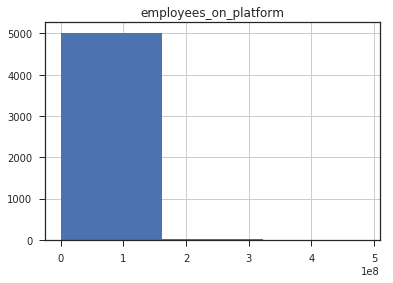

In [30]:
number_employ.hist(grid=True, xlabelsize=10, ylabelsize=10, bins=3)

In [13]:
#correlation matrix 
industries = data_project[['industry']]

number_employ2 = pd.DataFrame(data_project.groupby('industry')['employees_on_platform'].apply(lambda x: sum(x)))#.shape[0]).rename('number_employers'))

data_project_matrix2 = number_employ2.merge(industries, on = 'industry')
data_project_matrix2 = data_project_matrix2.drop_duplicates()

df3=data_project_matrix2.pivot(columns='industry', values='employees_on_platform')
df3.head()

industry,Accounting,Airlines/Aviation,Apparel & Fashion,Apparel &amp; Fashion,Automotive,Aviation & Aerospace,Aviation &amp; Aerospace,Banking,Biotechnology,Broadcast Media,...,Transportation/Trucking/Railroad,Utilities,Venture Capital & Private Equity,Venture Capital &amp; Private Equity,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
0,5374026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,191821141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21616,NaN,NaN,56188291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38189,NaN,NaN,NaN,5105648.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39410,NaN,NaN,NaN,NaN,531717088.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57e766eac8>,
      dtype=object)

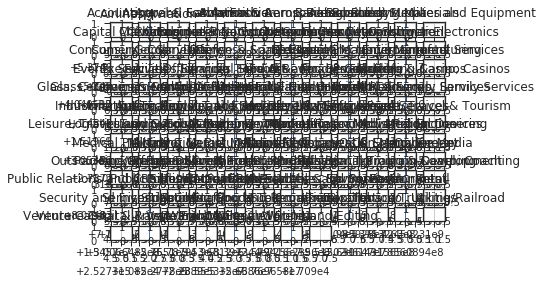

In [14]:
#histogram
df3.hist(bins=50)

# number of employees by industry

In [23]:
number_employ2.head()

,employees_on_platform
industry,
Accounting,5374026
Airlines/Aviation,191821141
Apparel & Fashion,56188291
Apparel &amp; Fashion,5105648
Automotive,531717088


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57d7d3c208>]],
      dtype=object)

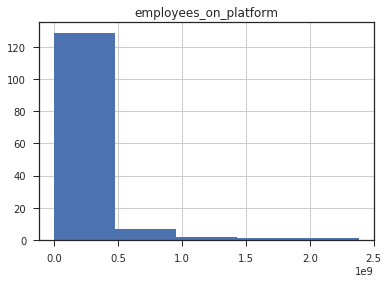

In [24]:
number_employ2.hist(grid=True, xlabelsize=10, ylabelsize=10, bins=5)